In [2]:
import pandas as pd
import re

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [643]:
summary = pd.read_csv("./atussum_2013.dat")
summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11385 entries, 0 to 11384
Columns: 413 entries, tucaseid to t500107
dtypes: float64(1), int64(412)
memory usage: 36.0 MB


In [644]:
summary.columns

Index(['tucaseid', 'TUFINLWGT', 'TRYHHCHILD', 'TEAGE', 'TESEX', 'PEEDUCA',
       'PTDTRACE', 'PEHSPNON', 'GTMETSTA', 'TELFS', 
       ...
       't181501', 't181599', 't181601', 't181801', 't189999', 't500101',
       't500103', 't500105', 't500106', 't500107'],
      dtype='object', length=413)

In [645]:
my_summary = summary.drop('TRYHHCHILD', 1)

In [646]:
my_summary = my_summary.drop('PEEDUCA', 1)

In [647]:
my_summary = my_summary.drop('PTDTRACE', 1)

In [648]:
my_summary = my_summary.drop('PEHSPNON', 1)

In [649]:
my_summary = my_summary.drop('GTMETSTA', 1)

In [650]:
my_summary = my_summary.drop('TRDPFTPT', 1)

In [651]:
my_summary = my_summary.drop('TESCHENR', 1)

In [652]:
my_summary = my_summary.drop('TESCHLVL', 1)

In [653]:
my_summary = my_summary.drop('TESPEMPNOT', 1)

In [654]:
my_summary = my_summary.drop('TRSPPRES', 1)

In [655]:
my_summary = my_summary.drop('TRCHILDNUM', 1)

In [656]:
my_summary = my_summary.drop('TRSPFTPT', 1)

In [657]:
my_summary = my_summary.drop('TRHOLIDAY', 1)

In [658]:
my_summary = my_summary.drop('TRTEC', 1)

In [659]:
my_summary = my_summary.drop('TRTHH', 1)

In [660]:
my_summary = my_summary.drop('TEMJOT', 1)

In [661]:
my_summary = my_summary.drop('TUDIARYDAY', 1)

In [662]:
my_summary.rename(columns={'TRERNWA': 'WEEKLY_EARNINGS',
                           'TEHRUSLT': 'WEEKLY_HRS',
                            'TESEX': 'SEX',
                            'TEAGE': 'AGE',
                            'TELFS': 'LABOR_FORCE_STATUS',
                            'TUFINLWGT': 'STATISTICAL_WEIGHT'}, inplace=True)

In [663]:
my_summary.columns

Index(['tucaseid', 'STATISTICAL_WEIGHT', 'AGE', 'SEX', 'LABOR_FORCE_STATUS',
       'WEEKLY_EARNINGS', 'WEEKLY_HRS', 't010101', 't010102', 't010201', 
       ...
       't181501', 't181599', 't181601', 't181801', 't189999', 't500101',
       't500103', 't500105', 't500106', 't500107'],
      dtype='object', length=396)

In [664]:
my_sum_temp = my_summary[ my_summary['WEEKLY_EARNINGS'] > 0 ]

In [665]:
my_sum_temp = my_sum_temp[ my_sum_temp['WEEKLY_HRS'] > 0 ]

In [666]:
my_summary = my_sum_temp

# get rid of people not in the work force and then drop the column

In [667]:
temp_sum = my_summary[ my_summary['LABOR_FORCE_STATUS'] != 1 ]

In [668]:
temp_sum = my_summary[ my_summary['LABOR_FORCE_STATUS'] != 2 ]

In [669]:
my_summary = temp_sum

In [670]:
my_summary = my_summary.drop('LABOR_FORCE_STATUS', 1)

In [671]:
my_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5543 entries, 1 to 11383
Columns: 395 entries, tucaseid to t500107
dtypes: float64(1), int64(394)
memory usage: 16.7 MB


# start working on activity codes

In [672]:
my_summary.columns

Index(['tucaseid', 'STATISTICAL_WEIGHT', 'AGE', 'SEX', 'WEEKLY_EARNINGS',
       'WEEKLY_HRS', 't010101', 't010102', 't010201', 't010299', 
       ...
       't181501', 't181599', 't181601', 't181801', 't189999', 't500101',
       't500103', 't500105', 't500106', 't500107'],
      dtype='object', length=395)

In [673]:
my_summary.columns

Index(['tucaseid', 'STATISTICAL_WEIGHT', 'AGE', 'SEX', 'WEEKLY_EARNINGS',
       'WEEKLY_HRS', 't010101', 't010102', 't010201', 't010299', 
       ...
       't181501', 't181599', 't181601', 't181801', 't189999', 't500101',
       't500103', 't500105', 't500106', 't500107'],
      dtype='object', length=395)

In [674]:
def activity_columns(data, activity_code):
    """For the activity code given, return all columns that fall under that activity."""
    col_prefix = "t{}".format(activity_code)
    return [column for column in data.columns if re.match(col_prefix, column)]

In [675]:
my_temp_sum = activity_columns(my_summary, "05")

In [676]:
my_temp_sum = my_summary[['tucaseid','SEX','AGE','WEEKLY_EARNINGS','WEEKLY_HRS']]

In [677]:
my_temp_sum.columns

Index(['tucaseid', 'SEX', 'AGE', 'WEEKLY_EARNINGS', 'WEEKLY_HRS'], dtype='object')

In [678]:
my_temp_sum['WEEKLY_EARNINGS'] = my_temp_sum['WEEKLY_EARNINGS'] / 100

/Users/traciarms/ironyard/sandbox/atus-analysis/.direnv/python-3.4.3/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [679]:
my_temp_sum['HOURLY_WAGE'] = my_temp_sum['WEEKLY_EARNINGS'] / my_temp_sum['WEEKLY_HRS']

/Users/traciarms/ironyard/sandbox/atus-analysis/.direnv/python-3.4.3/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [680]:
my_temp_sum.sort('WEEKLY_EARNINGS',)[::-1].head()

,tucaseid,SEX,AGE,WEEKLY_EARNINGS,WEEKLY_HRS,HOURLY_WAGE
5417,20130605131371,1,56,2884.61,72,40.064028
6036,20130705131066,2,55,2884.61,80,36.057625
8554,20130908132409,1,61,2884.61,40,72.115250
4119,20130404131734,2,32,2884.61,52,55.473269
3808,20130403132064,1,52,2884.61,50,57.692200


In [681]:
highest_wages = my_temp_sum.sort('HOURLY_WAGE',)[::-1]

In [682]:
highest_wages_50s = highest_wages[ (highest_wages['AGE'] >=50) & (highest_wages['AGE'] <=59) ]

In [683]:
highest_wages_40s = highest_wages[ (highest_wages['AGE'] >=40) & (highest_wages['AGE'] <=49) ]

In [684]:
highest_wages_30s = highest_wages[ (highest_wages['AGE'] >=30) & (highest_wages['AGE'] <=39) ]

In [685]:
highest_wages_20s = highest_wages[ (highest_wages['AGE'] >=20) & (highest_wages['AGE'] <=29) ]

In [686]:
highest_wages_50s.head()

,tucaseid,SEX,AGE,WEEKLY_EARNINGS,WEEKLY_HRS,HOURLY_WAGE
6062,20130705131466,2,56,440.00,4,110.000000
7237,20130807130925,1,53,2884.61,30,96.153667
6283,20130706131014,1,56,1153.84,12,96.153333
6514,20130706131821,2,58,769.00,8,96.125000
8001,20130908130648,2,53,2884.61,34,84.841471


In [687]:
highest_wages_40s.head()

,tucaseid,SEX,AGE,WEEKLY_EARNINGS,WEEKLY_HRS,HOURLY_WAGE
3204,20130402132245,1,49,125.00,1,125.000000
3996,20130404130168,2,49,1000.00,8,125.000000
4906,20130504132472,2,42,2884.61,28,103.021786
8710,20130909131967,2,42,800.00,8,100.000000
1462,20130201131419,1,47,2884.61,35,82.417429


In [688]:
highest_wages_30s.head()

,tucaseid,SEX,AGE,WEEKLY_EARNINGS,WEEKLY_HRS,HOURLY_WAGE
3923,20130403132392,1,31,1365.38,4,341.345000
6599,20130706132155,2,30,2416.00,20,120.800000
4371,20130504130649,2,38,352.00,3,117.333333
1749,20130201132332,1,30,1632.00,16,102.000000
10478,20131210131602,1,33,2884.61,30,96.153667


In [689]:
highest_wages_20s.head()

,tucaseid,SEX,AGE,WEEKLY_EARNINGS,WEEKLY_HRS,HOURLY_WAGE
11306,20131212131341,1,26,2692.30,30,89.743333
10094,20131110131932,1,27,826.92,10,82.692000
587,20130112121213,2,29,2884.61,40,72.115250
257,20130111122022,2,27,2800.00,45,62.222222
10690,20131211130773,2,28,2480.00,40,62.000000


# Start respondant table

In [690]:
respondant = pd.read_csv("./atusresp_2013.dat")
activities = pd.read_csv("./atusact_2013.dat")

In [746]:
respondant_job = respondant[ ['TUCASEID', 'TEIO1OCD'] ]

In [747]:
top_10_w_jobID = pd.merge(top_ten_wages, respondant_job, left_on="tucaseid", right_on="TUCASEID")

In [748]:
highest_wages_50_jobID = pd.merge(highest_wages_50s, respondant_job, left_on="tucaseid", right_on="TUCASEID")

In [749]:
highest_wages_50_jobID.head()

,tucaseid,SEX,AGE,WEEKLY_EARNINGS,WEEKLY_HRS,HOURLY_WAGE,TUCASEID,TEIO1OCD
0,20130705131466,2,56,440.00,4,110.000000,20130705131466,2340
1,20130807130925,1,53,2884.61,30,96.153667,20130807130925,3010
2,20130706131014,1,56,1153.84,12,96.153333,20130706131014,9130
3,20130706131821,2,58,769.00,8,96.125000,20130706131821,2160
4,20130908130648,2,53,2884.61,34,84.841471,20130908130648,3060


In [750]:
highest_wages_40_jobID = pd.merge(highest_wages_40s, respondant_job, left_on="tucaseid", right_on="TUCASEID")

In [751]:
highest_wages_30_jobID = pd.merge(highest_wages_30s, respondant_job, left_on="tucaseid", right_on="TUCASEID")

In [752]:
highest_wages_20_jobID = pd.merge(highest_wages_20s, respondant_job, left_on="tucaseid", right_on="TUCASEID")

In [753]:
highest_wages_50_jobID = highest_wages_50_jobID.drop('TUCASEID', 1)

In [754]:
highest_wages_40_jobID = highest_wages_40_jobID.drop('TUCASEID', 1)

In [755]:
highest_wages_30_jobID = highest_wages_30_jobID.drop('TUCASEID', 1)

In [756]:
highest_wages_20_jobID = highest_wages_20_jobID.drop('TUCASEID', 1)

In [757]:
highest_wages_50_jobID.rename(columns={'TEIO1OCD': 'OCC_ID'}, inplace=True)

In [758]:
highest_wages_40_jobID.rename(columns={'TEIO1OCD': 'OCC_ID'}, inplace=True)

In [759]:
highest_wages_40_jobID = highest_wages_40_jobID[ highest_wages_40_jobID['OCC_ID'] != 4220] 

In [760]:
highest_wages_30_jobID.rename(columns={'TEIO1OCD': 'OCC_ID'}, inplace=True)

In [761]:
highest_wages_20_jobID.rename(columns={'TEIO1OCD': 'OCC_ID'}, inplace=True)

In [762]:
highest_wages_50_jobID = highest_wages_50_jobID.head()

In [763]:
highest_wages_40_jobID = highest_wages_40_jobID.head()

In [764]:
highest_wages_30_jobID = highest_wages_30_jobID.head()

In [765]:
highest_wages_20_jobID = highest_wages_20_jobID.head()

In [766]:
highest_wages_50_jobID['OCC_ID']

0    2340
1    3010
2    9130
3    2160
4    3060
Name: OCC_ID, dtype: int64

In [576]:
top_10_w_jobID.rename(columns={'TEIO1OCD': 'OCC_ID'}, inplace=True)

In [767]:
OCCUPATION = pd.Series({1410: "Electrical and electronics engineers: Architecture and engineering occupations",
                        220: "Construction managers: Management",
                        7200: "Automotive service technicians and mechanics:  Installation, maintenance, and repair occupations",
                        10: "Chief executives: Management occupations",
                        2100: "Lawyers: Legal occupations",
                        410: "Property, real estate, and community association managers",
                        430: "Managers, all other",
                        3250: "Veterinarians",
                        310: "Food service managers",
                        2010: "Social workers",
                        3010: "Dentists",
                        9130: "Driver/sales workers and truck drivers",
                        2160: "Miscellaneous legal support workers",
                        3060: "Physicians and surgeons",
                        6420: "Painters, construction and maintenance",
                        9600: "Industrial truck and tractor operators",
                        7810: "Butchers and other meat, poultry, and fish processing workers",
                        9050: "Flight attendants: Transportation and material moving occupations",
                        2540: "Teacher assistants: Education, training, and library occupations",
                        2340: "Other teachers and instructors",
                        2310: "Elementary and middle school teachers",
                        3255: "Registered nurses",
                        7630: "Other installation, maintenance, and repair workers:  Installation, maintenance, and repair occupations"})

In [768]:
highest_wages_50_jobID['JOB_DESC'] = highest_wages_50_jobID.OCC_ID.map(OCCUPATION)

In [769]:
highest_wages_50_jobID

,tucaseid,SEX,AGE,WEEKLY_EARNINGS,WEEKLY_HRS,HOURLY_WAGE,OCC_ID,JOB_DESC
0,20130705131466,2,56,440.00,4,110.000000,2340,Other teachers and instructors
1,20130807130925,1,53,2884.61,30,96.153667,3010,Dentists
2,20130706131014,1,56,1153.84,12,96.153333,9130,Driver/sales workers and truck drivers
3,20130706131821,2,58,769.00,8,96.125000,2160,Miscellaneous legal support workers
4,20130908130648,2,53,2884.61,34,84.841471,3060,Physicians and surgeons


In [770]:
highest_wages_40_jobID['JOB_DESC'] = highest_wages_40_jobID.OCC_ID.map(OCCUPATION)

In [771]:
highest_wages_40_jobID

,tucaseid,SEX,AGE,WEEKLY_EARNINGS,WEEKLY_HRS,HOURLY_WAGE,OCC_ID,JOB_DESC
1,20130404130168,2,49,1000.00,8,125.000000,9050,Flight attendants: Transportation and material...
2,20130504132472,2,42,2884.61,28,103.021786,2540,"Teacher assistants: Education, training, and l..."
3,20130909131967,2,42,800.00,8,100.000000,9600,Industrial truck and tractor operators
4,20130201131419,1,47,2884.61,35,82.417429,2310,Elementary and middle school teachers
5,20130807131178,2,42,2884.61,36,80.128056,3255,Registered nurses


In [772]:
highest_wages_30_jobID['JOB_DESC'] = highest_wages_30_jobID.OCC_ID.map(OCCUPATION)

In [773]:
highest_wages_30_jobID

,tucaseid,SEX,AGE,WEEKLY_EARNINGS,WEEKLY_HRS,HOURLY_WAGE,OCC_ID,JOB_DESC
0,20130403132392,1,31,1365.38,4,341.345000,1410,Electrical and electronics engineers: Architec...
1,20130706132155,2,30,2416.00,20,120.800000,2540,"Teacher assistants: Education, training, and l..."
2,20130504130649,2,38,352.00,3,117.333333,2540,"Teacher assistants: Education, training, and l..."
3,20130201132332,1,30,1632.00,16,102.000000,6420,"Painters, construction and maintenance"
4,20131210131602,1,33,2884.61,30,96.153667,7810,"Butchers and other meat, poultry, and fish pro..."


In [774]:
highest_wages_20_jobID['JOB_DESC'] = highest_wages_20_jobID.OCC_ID.map(OCCUPATION)

In [775]:
highest_wages_20_jobID

,tucaseid,SEX,AGE,WEEKLY_EARNINGS,WEEKLY_HRS,HOURLY_WAGE,OCC_ID,JOB_DESC
0,20131212131341,1,26,2692.30,30,89.743333,410,"Property, real estate, and community associati..."
1,20131110131932,1,27,826.92,10,82.692000,430,"Managers, all other"
2,20130112121213,2,29,2884.61,40,72.115250,3250,Veterinarians
3,20130111122022,2,27,2800.00,45,62.222222,310,Food service managers
4,20131211130773,2,28,2480.00,40,62.000000,2010,Social workers


#Next lets look at the activities in the different age groups

In [601]:
top10_activities = pd.merge(top_10_w_jobID, activities, left_on="tucaseid", right_on="TUCASEID")

In [ ]:
top10_activities = top10_activities.drop('TUCASEID', 1)

In [ ]:
top10_activ_codes = top10_activ_codes[ top10_activ_codes['TUTIER1CODE'] == 12]

In [857]:
highest_wages_50_jobID_act = pd.merge(highest_wages_50_jobID, activities, left_on="tucaseid", right_on="TUCASEID")
highest_wages_50_jobID_act = highest_wages_50_jobID_act.drop('TUCASEID', 1)
highest_wages_50_jobID_act = highest_wages_50_jobID_act[['tucaseid','SEX','AGE','WEEKLY_EARNINGS','HOURLY_WAGE', 'WEEKLY_HRS',
                                      'JOB_DESC','TRCODE','TUTIER1CODE','TUCUMDUR']]
highest_wages_50_jobID_act = highest_wages_50_jobID_act[ highest_wages_50_jobID_act['TUTIER1CODE'] == 12]
highest_wages_50_jobID_act = highest_wages_50_jobID_act.drop('TUTIER1CODE', 1)

In [858]:
highest_wages_50_jobID_act

,tucaseid,SEX,AGE,WEEKLY_EARNINGS,HOURLY_WAGE,WEEKLY_HRS,JOB_DESC,TRCODE,TUCUMDUR
14,20130705131466,2,56,440.00,110.000000,4,Other teachers and instructors,120303,1095
21,20130807130925,1,53,2884.61,96.153667,30,Dentists,120307,240
31,20130807130925,1,53,2884.61,96.153667,30,Dentists,120312,775
34,20130807130925,1,53,2884.61,96.153667,30,Dentists,120303,1020
40,20130706131014,1,56,1153.84,96.153333,12,Driver/sales workers and truck drivers,120303,1080
59,20130706131821,2,58,769.00,96.125000,8,Miscellaneous legal support workers,120101,909
65,20130706131821,2,58,769.00,96.125000,8,Miscellaneous legal support workers,120312,1114
79,20130908130648,2,53,2884.61,84.841471,34,Physicians and surgeons,120301,1060


In [859]:
highest_wages_40_jobID_act = pd.merge(highest_wages_40_jobID, activities, left_on="tucaseid", right_on="TUCASEID")
highest_wages_40_jobID_act = highest_wages_40_jobID_act.drop('TUCASEID', 1)
highest_wages_40_jobID_act = highest_wages_40_jobID_act[['tucaseid','SEX','AGE','WEEKLY_EARNINGS','HOURLY_WAGE', 'WEEKLY_HRS',
                                      'JOB_DESC','TRCODE','TUTIER1CODE','TUCUMDUR']]
highest_wages_40_jobID_act = highest_wages_40_jobID_act[ highest_wages_40_jobID_act['TUTIER1CODE'] == 12]
highest_wages_40_jobID_act = highest_wages_40_jobID_act.drop('TUTIER1CODE', 1)

In [860]:
highest_wages_40_jobID_act

,tucaseid,SEX,AGE,WEEKLY_EARNINGS,HOURLY_WAGE,WEEKLY_HRS,JOB_DESC,TRCODE,TUCUMDUR
3,20130404130168,2,49,1000.00,125.000000,8,Flight attendants: Transportation and material...,120303,270
9,20130404130168,2,49,1000.00,125.000000,8,Flight attendants: Transportation and material...,120101,520
16,20130404130168,2,49,1000.00,125.000000,8,Flight attendants: Transportation and material...,120101,625
20,20130404130168,2,49,1000.00,125.000000,8,Flight attendants: Transportation and material...,120101,780
23,20130404130168,2,49,1000.00,125.000000,8,Flight attendants: Transportation and material...,120308,812
32,20130404130168,2,49,1000.00,125.000000,8,Flight attendants: Transportation and material...,120308,989
34,20130404130168,2,49,1000.00,125.000000,8,Flight attendants: Transportation and material...,120101,1051
35,20130404130168,2,49,1000.00,125.000000,8,Flight attendants: Transportation and material...,120312,1111
36,20130404130168,2,49,1000.00,125.000000,8,Flight attendants: Transportation and material...,120303,1141
53,20130504132472,2,42,2884.61,103.021786,28,"Teacher assistants: Education, training, and l...",120101,990


In [861]:
highest_wages_30_jobID_act = pd.merge(highest_wages_30_jobID, activities, left_on="tucaseid", right_on="TUCASEID")
highest_wages_30_jobID_act = highest_wages_30_jobID_act.drop('TUCASEID', 1)
highest_wages_30_jobID_act = highest_wages_30_jobID_act[['tucaseid','SEX','AGE','WEEKLY_EARNINGS','HOURLY_WAGE', 'WEEKLY_HRS',
                                      'JOB_DESC','TRCODE','TUTIER1CODE','TUCUMDUR']]
highest_wages_30_jobID_act = highest_wages_30_jobID_act[ highest_wages_30_jobID_act['TUTIER1CODE'] == 12]
highest_wages_30_jobID_act = highest_wages_30_jobID_act.drop('TUTIER1CODE', 1)

In [862]:
highest_wages_30_jobID_act

,tucaseid,SEX,AGE,WEEKLY_EARNINGS,HOURLY_WAGE,WEEKLY_HRS,JOB_DESC,TRCODE,TUCUMDUR
14,20130403132392,1,31,1365.38,341.345000,4,Electrical and electronics engineers: Architec...,120303,840
17,20130403132392,1,31,1365.38,341.345000,4,Electrical and electronics engineers: Architec...,120303,1080
36,20130706132155,2,30,2416.00,120.800000,20,"Teacher assistants: Education, training, and l...",120312,760
41,20130706132155,2,30,2416.00,120.800000,20,"Teacher assistants: Education, training, and l...",120101,920
42,20130706132155,2,30,2416.00,120.800000,20,"Teacher assistants: Education, training, and l...",120303,1110
63,20130504130649,2,38,352.00,117.333333,3,"Teacher assistants: Education, training, and l...",120101,1050
66,20130504130649,2,38,352.00,117.333333,3,"Teacher assistants: Education, training, and l...",120101,1090
71,20130201132332,1,30,1632.00,102.000000,16,"Painters, construction and maintenance",120303,600
75,20130201132332,1,30,1632.00,102.000000,16,"Painters, construction and maintenance",120303,1140
85,20131210131602,1,33,2884.61,96.153667,30,"Butchers and other meat, poultry, and fish pro...",120303,570


In [863]:
highest_wages_20_jobID_act = pd.merge(highest_wages_20_jobID, activities, left_on="tucaseid", right_on="TUCASEID")
highest_wages_20_jobID_act = highest_wages_20_jobID_act.drop('TUCASEID', 1)
highest_wages_20_jobID_act = highest_wages_20_jobID_act[['tucaseid','SEX','AGE','WEEKLY_EARNINGS','HOURLY_WAGE', 'WEEKLY_HRS',
                                      'JOB_DESC','TRCODE','TUTIER1CODE','TUCUMDUR']]
highest_wages_20_jobID_act = highest_wages_20_jobID_act[ highest_wages_20_jobID_act['TUTIER1CODE'] == 12]
highest_wages_20_jobID_act = highest_wages_20_jobID_act.drop('TUTIER1CODE', 1)

In [864]:
highest_wages_20_jobID_act

,tucaseid,SEX,AGE,WEEKLY_EARNINGS,HOURLY_WAGE,WEEKLY_HRS,JOB_DESC,TRCODE,TUCUMDUR
12,20131212131341,1,26,2692.30,89.743333,30,"Property, real estate, and community associati...",120301,710
16,20131212131341,1,26,2692.30,89.743333,30,"Property, real estate, and community associati...",120301,890
19,20131212131341,1,26,2692.30,89.743333,30,"Property, real estate, and community associati...",120101,1320
26,20131110131932,1,27,826.92,82.692000,10,"Managers, all other",120303,420
28,20131110131932,1,27,826.92,82.692000,10,"Managers, all other",120303,540
37,20131110131932,1,27,826.92,82.692000,10,"Managers, all other",120303,1125
50,20130112121213,2,29,2884.61,72.115250,40,Veterinarians,120303,1110
75,20131211130773,2,28,2480.00,62.000000,40,Social workers,120301,375
89,20131211130773,2,28,2480.00,62.000000,40,Social workers,120301,1080


In [865]:
LEISURE = pd.Series({120101: "Socializing and communicating with others",
                        120303: "Television and movies (not religious)",
                        120301: "Relaxing, thinking",
                        120499: "Arts and entertainment, n.e.c.*",
                        120312: "Reading for personal interest",
                        120308: "Computer use for leisure (excluding games)",
                        120201: "Attending or hosting parties/receptions/ceremonies",
                        120307: "Playing games"})

In [866]:
highest_wages_20_jobID_act['LEISURE_ACT'] = highest_wages_20_jobID_act.TRCODE.map(LEISURE)
highest_wages_30_jobID_act['LEISURE_ACT'] = highest_wages_30_jobID_act.TRCODE.map(LEISURE)
highest_wages_40_jobID_act['LEISURE_ACT'] = highest_wages_40_jobID_act.TRCODE.map(LEISURE)
highest_wages_50_jobID_act['LEISURE_ACT'] = highest_wages_50_jobID_act.TRCODE.map(LEISURE)

In [867]:
highest_wages_20_jobID_act = highest_wages_20_jobID_act.drop('TRCODE',1)
highest_wages_30_jobID_act = highest_wages_30_jobID_act.drop('TRCODE',1)
highest_wages_40_jobID_act = highest_wages_40_jobID_act.drop('TRCODE',1)
highest_wages_50_jobID_act = highest_wages_50_jobID_act.drop('TRCODE',1)

In [868]:
highest_wages_20_jobID_act

,tucaseid,SEX,AGE,WEEKLY_EARNINGS,HOURLY_WAGE,WEEKLY_HRS,JOB_DESC,TUCUMDUR,LEISURE_ACT
12,20131212131341,1,26,2692.30,89.743333,30,"Property, real estate, and community associati...",710,"Relaxing, thinking"
16,20131212131341,1,26,2692.30,89.743333,30,"Property, real estate, and community associati...",890,"Relaxing, thinking"
19,20131212131341,1,26,2692.30,89.743333,30,"Property, real estate, and community associati...",1320,Socializing and communicating with others
26,20131110131932,1,27,826.92,82.692000,10,"Managers, all other",420,Television and movies (not religious)
28,20131110131932,1,27,826.92,82.692000,10,"Managers, all other",540,Television and movies (not religious)
37,20131110131932,1,27,826.92,82.692000,10,"Managers, all other",1125,Television and movies (not religious)
50,20130112121213,2,29,2884.61,72.115250,40,Veterinarians,1110,Television and movies (not religious)
75,20131211130773,2,28,2480.00,62.000000,40,Social workers,375,"Relaxing, thinking"
89,20131211130773,2,28,2480.00,62.000000,40,Social workers,1080,"Relaxing, thinking"


In [870]:
highest_wages_30_jobID_act

,tucaseid,SEX,AGE,WEEKLY_EARNINGS,HOURLY_WAGE,WEEKLY_HRS,JOB_DESC,TUCUMDUR,LEISURE_ACT
14,20130403132392,1,31,1365.38,341.345000,4,Electrical and electronics engineers: Architec...,840,Television and movies (not religious)
17,20130403132392,1,31,1365.38,341.345000,4,Electrical and electronics engineers: Architec...,1080,Television and movies (not religious)
36,20130706132155,2,30,2416.00,120.800000,20,"Teacher assistants: Education, training, and l...",760,Reading for personal interest
41,20130706132155,2,30,2416.00,120.800000,20,"Teacher assistants: Education, training, and l...",920,Socializing and communicating with others
42,20130706132155,2,30,2416.00,120.800000,20,"Teacher assistants: Education, training, and l...",1110,Television and movies (not religious)
63,20130504130649,2,38,352.00,117.333333,3,"Teacher assistants: Education, training, and l...",1050,Socializing and communicating with others
66,20130504130649,2,38,352.00,117.333333,3,"Teacher assistants: Education, training, and l...",1090,Socializing and communicating with others
71,20130201132332,1,30,1632.00,102.000000,16,"Painters, construction and maintenance",600,Television and movies (not religious)
75,20130201132332,1,30,1632.00,102.000000,16,"Painters, construction and maintenance",1140,Television and movies (not religious)
85,20131210131602,1,33,2884.61,96.153667,30,"Butchers and other meat, poultry, and fish pro...",570,Television and movies (not religious)


In [872]:
highest_wages_40_jobID_act

,tucaseid,SEX,AGE,WEEKLY_EARNINGS,HOURLY_WAGE,WEEKLY_HRS,JOB_DESC,TUCUMDUR,LEISURE_ACT
3,20130404130168,2,49,1000.00,125.000000,8,Flight attendants: Transportation and material...,270,Television and movies (not religious)
9,20130404130168,2,49,1000.00,125.000000,8,Flight attendants: Transportation and material...,520,Socializing and communicating with others
16,20130404130168,2,49,1000.00,125.000000,8,Flight attendants: Transportation and material...,625,Socializing and communicating with others
20,20130404130168,2,49,1000.00,125.000000,8,Flight attendants: Transportation and material...,780,Socializing and communicating with others
23,20130404130168,2,49,1000.00,125.000000,8,Flight attendants: Transportation and material...,812,Computer use for leisure (excluding games)
32,20130404130168,2,49,1000.00,125.000000,8,Flight attendants: Transportation and material...,989,Computer use for leisure (excluding games)
34,20130404130168,2,49,1000.00,125.000000,8,Flight attendants: Transportation and material...,1051,Socializing and communicating with others
35,20130404130168,2,49,1000.00,125.000000,8,Flight attendants: Transportation and material...,1111,Reading for personal interest
36,20130404130168,2,49,1000.00,125.000000,8,Flight attendants: Transportation and material...,1141,Television and movies (not religious)
53,20130504132472,2,42,2884.61,103.021786,28,"Teacher assistants: Education, training, and l...",990,Socializing and communicating with others


In [836]:
highest_wages_50_jobID_act

,tucaseid,SEX,AGE,WEEKLY_EARNINGS,HOURLY_WAGE,WEEKLY_HRS,JOB_DESC,TUCUMDUR,LEISURE_ACT
14,20130705131466,2,56,440.00,110.000000,4,Other teachers and instructors,1095,Television and movies (not religious)
21,20130807130925,1,53,2884.61,96.153667,30,Dentists,240,Playing games
31,20130807130925,1,53,2884.61,96.153667,30,Dentists,775,Reading for personal interest
34,20130807130925,1,53,2884.61,96.153667,30,Dentists,1020,Television and movies (not religious)
40,20130706131014,1,56,1153.84,96.153333,12,Driver/sales workers and truck drivers,1080,Television and movies (not religious)
59,20130706131821,2,58,769.00,96.125000,8,Miscellaneous legal support workers,909,Socializing and communicating with others
65,20130706131821,2,58,769.00,96.125000,8,Miscellaneous legal support workers,1114,Reading for personal interest
79,20130908130648,2,53,2884.61,84.841471,34,Physicians and surgeons,1060,"Relaxing, thinking"


# Look at Sports excercise recreation

In [876]:
highest_wages_50_jobID_sprt = pd.merge(highest_wages_50_jobID, activities, left_on="tucaseid", right_on="TUCASEID")
highest_wages_50_jobID_sprt = highest_wages_50_jobID_sprt.drop('TUCASEID', 1)
highest_wages_50_jobID_sprt = highest_wages_50_jobID_sprt[['tucaseid','SEX','AGE','WEEKLY_EARNINGS','HOURLY_WAGE', 'WEEKLY_HRS',
                                      'JOB_DESC','TRCODE','TUTIER1CODE','TUCUMDUR']]
highest_wages_50_jobID_sprt = highest_wages_50_jobID_sprt[ highest_wages_50_jobID_sprt['TUTIER1CODE'] == 13]
highest_wages_50_jobID_sprt = highest_wages_50_jobID_sprt.drop('TUTIER1CODE', 1)

In [877]:
highest_wages_50_jobID_sprt

,tucaseid,SEX,AGE,WEEKLY_EARNINGS,HOURLY_WAGE,WEEKLY_HRS,JOB_DESC,TRCODE,TUCUMDUR


In [878]:
highest_wages_40_jobID_sprt = pd.merge(highest_wages_40_jobID, activities, left_on="tucaseid", right_on="TUCASEID")
highest_wages_40_jobID_sprt = highest_wages_40_jobID_sprt.drop('TUCASEID', 1)
highest_wages_40_jobID_sprt = highest_wages_40_jobID_sprt[['tucaseid','SEX','AGE','WEEKLY_EARNINGS','HOURLY_WAGE', 'WEEKLY_HRS',
                                      'JOB_DESC','TRCODE','TUTIER1CODE','TUCUMDUR']]
highest_wages_40_jobID_sprt = highest_wages_40_jobID_sprt[ highest_wages_40_jobID_sprt['TUTIER1CODE'] == 13]
highest_wages_40_jobID_sprt = highest_wages_40_jobID_sprt.drop('TUTIER1CODE', 1)

In [879]:
highest_wages_40_jobID_sprt

,tucaseid,SEX,AGE,WEEKLY_EARNINGS,HOURLY_WAGE,WEEKLY_HRS,JOB_DESC,TRCODE,TUCUMDUR
39,20130504132472,2,42,2884.61,103.021786,28,"Teacher assistants: Education, training, and l...",130131,240
76,20130909131967,2,42,800.00,100.000000,8,Industrial truck and tractor operators,130109,810


In [880]:
highest_wages_30_jobID_sprt = pd.merge(highest_wages_30_jobID, activities, left_on="tucaseid", right_on="TUCASEID")
highest_wages_30_jobID_sprt = highest_wages_30_jobID_sprt.drop('TUCASEID', 1)
highest_wages_30_jobID_sprt = highest_wages_30_jobID_sprt[['tucaseid','SEX','AGE','WEEKLY_EARNINGS','HOURLY_WAGE', 'WEEKLY_HRS',
                                      'JOB_DESC','TRCODE','TUTIER1CODE','TUCUMDUR']]
highest_wages_30_jobID_sprt = highest_wages_30_jobID_sprt[ highest_wages_30_jobID_sprt['TUTIER1CODE'] == 13]
highest_wages_30_jobID_sprt = highest_wages_30_jobID_sprt.drop('TUTIER1CODE', 1)

In [881]:
highest_wages_30_jobID_sprt

,tucaseid,SEX,AGE,WEEKLY_EARNINGS,HOURLY_WAGE,WEEKLY_HRS,JOB_DESC,TRCODE,TUCUMDUR
33,20130706132155,2,30,2416,120.8,20,"Teacher assistants: Education, training, and l...",130136,650
34,20130706132155,2,30,2416,120.8,20,"Teacher assistants: Education, training, and l...",130132,680


In [882]:
highest_wages_20_jobID_sprt = pd.merge(highest_wages_20_jobID, activities, left_on="tucaseid", right_on="TUCASEID")
highest_wages_20_jobID_sprt = highest_wages_20_jobID_sprt.drop('TUCASEID', 1)
highest_wages_20_jobID_sprt = highest_wages_20_jobID_sprt[['tucaseid','SEX','AGE','WEEKLY_EARNINGS','HOURLY_WAGE', 'WEEKLY_HRS',
                                      'JOB_DESC','TRCODE','TUTIER1CODE','TUCUMDUR']]
highest_wages_20_jobID_sprt = highest_wages_20_jobID_sprt[ highest_wages_20_jobID_sprt['TUTIER1CODE'] == 13]
highest_wages_20_jobID_sprt = highest_wages_20_jobID_sprt.drop('TUTIER1CODE', 1)

In [883]:
highest_wages_20_jobID_sprt

,tucaseid,SEX,AGE,WEEKLY_EARNINGS,HOURLY_WAGE,WEEKLY_HRS,JOB_DESC,TRCODE,TUCUMDUR
14,20131212131341,1,26,2692.3,89.743333,30,"Property, real estate, and community associati...",130134,815


In [887]:
SPORTS = pd.Series({130134: "Working out, unspecified",
                    130132: "Participating in water sports",
                    130136: "Doing yoga",
                    130131: "Walking",
                    130109: "Dancing"})

In [888]:
highest_wages_20_jobID_sprt['SPORTS'] = highest_wages_20_jobID_sprt.TRCODE.map(SPORTS)
highest_wages_30_jobID_sprt['SPORTS'] = highest_wages_30_jobID_sprt.TRCODE.map(SPORTS)
highest_wages_40_jobID_sprt['SPORTS'] = highest_wages_40_jobID_sprt.TRCODE.map(SPORTS)
highest_wages_50_jobID_sprt['SPORTS'] = highest_wages_50_jobID_sprt.TRCODE.map(SPORTS)

In [889]:
highest_wages_20_jobID_sprt = highest_wages_20_jobID_sprt.drop('TRCODE',1)
highest_wages_30_jobID_sprt = highest_wages_30_jobID_sprt.drop('TRCODE',1)
highest_wages_40_jobID_sprt = highest_wages_40_jobID_sprt.drop('TRCODE',1)
highest_wages_50_jobID_sprt = highest_wages_50_jobID_sprt.drop('TRCODE',1)

# What do people with the most money and the most mount of free time do?

# How does it differ by age?  We will look at 20s, 30s, 40s, 50s

# 20's Leisure activity:

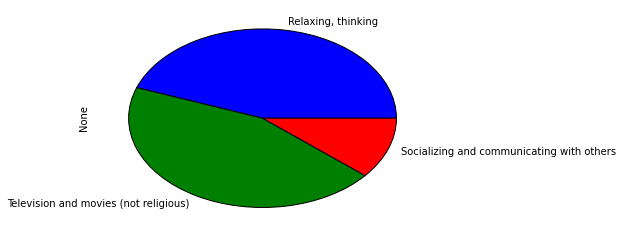

In [894]:
highest_wages_20_jobID_act.LEISURE_ACT.value_counts().plot(kind='pie')
plt.show()

#20's Sporting & recreation activity:

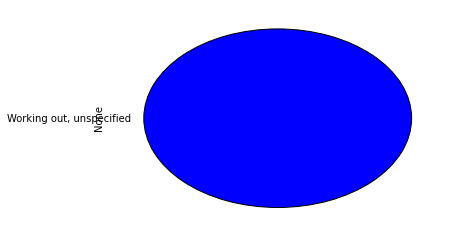

In [896]:
highest_wages_20_jobID_sprt.SPORTS.value_counts().plot(kind='pie')
plt.show()

# 30's Leisure activity:

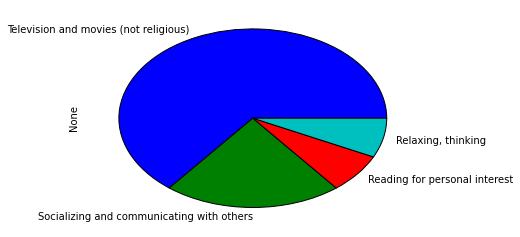

In [898]:
highest_wages_30_jobID_act.LEISURE_ACT.value_counts().plot(kind='pie')
plt.show()

# 30's Sporting & recreation activity:

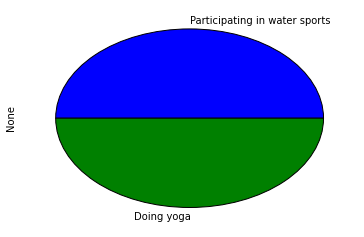

In [899]:
highest_wages_30_jobID_sprt.SPORTS.value_counts().plot(kind='pie')
plt.show()

# 40's Leisure activity:

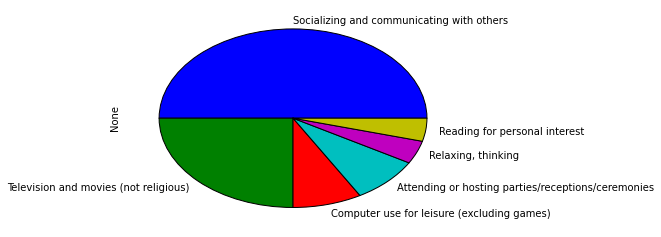

In [901]:
highest_wages_40_jobID_act.LEISURE_ACT.value_counts().plot(kind='pie')
plt.show()

# 40's Sporting & recreation activity:

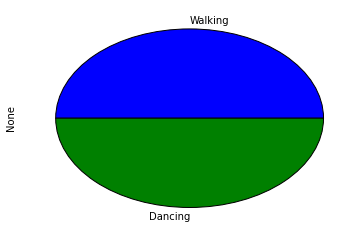

In [902]:
highest_wages_40_jobID_sprt.SPORTS.value_counts().plot(kind='pie')
plt.show()

#50's Leisure activity:

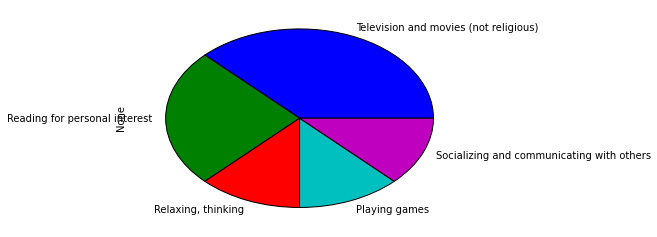

In [905]:
highest_wages_50_jobID_act.LEISURE_ACT.value_counts().plot(kind='pie')
plt.show()

#50's Sports and recreation:

In [908]:
# None!